In [1]:
import gym
import seagul.envs
import pickle
import torch.utils.data

from seagul.rl.run_utils import load_model, load_workspace
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
from pprint import pprint
import pandas as pd
from seagul.rl.models import PPOModel, SwitchedPPOModel, SwitchedPPOModelActHold
from seagul.nn import MLP

load_path =  './data/test/sac_test/'

model, env, args, ws = load_workspace(load_path)

/Users/sgillen/work/seagul/seagul/envs/__init__.py:77: UserWarning: Warning, registering environments for rllib failed!
  warnings.warn("Warning, registering environments for rllib failed!")


seagul.rl.run_utils
seagul.rl.run_utils


/Users/sgillen/anaconda3/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


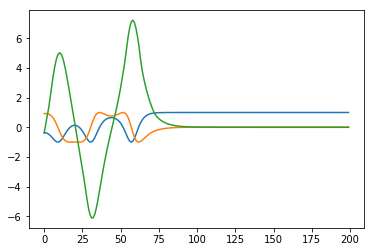

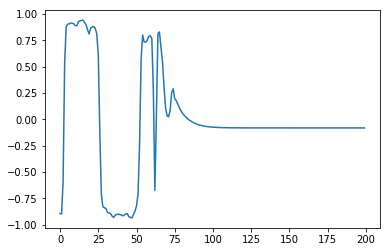

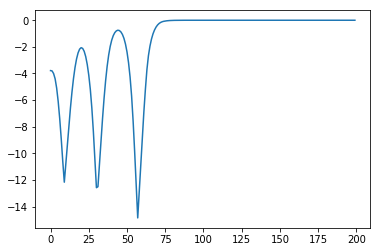

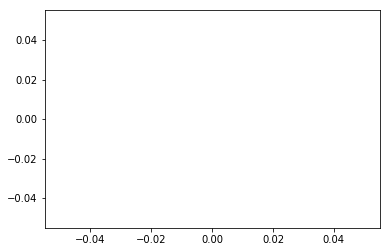

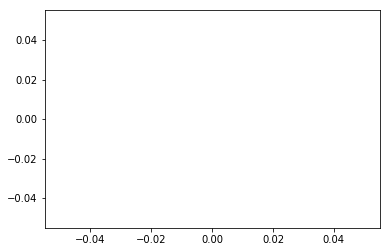

In [19]:
env = gym.make("Pendulum-v0")

done = False
obs = env.reset()

obs_list = []
act_list = []
rew_list = []
avg_list = []
val_list = []

 
dtype = torch.float32
act_size = env.action_space.shape[0]
obs = env.reset()
done = False

while not done:
    model_obs = torch.as_tensor(obs, dtype=dtype).detach() #TODO.... (or not, this still works with ppo right??)
    obs_list.append(obs)
    
    act, val, _ , logp = model.step(model_obs.reshape(1, -1))
    act = act.detach()

    obs, rew, done, _ = env.step(act.numpy().reshape(-1))
    env.render()

    act_list.append(act)
    rew_list.append(rew)

plt.plot(obs_list)
plt.figure()
plt.plot(act_list)
plt.figure()
plt.plot(rew_list)
plt.figure()
plt.plot(val_list)
plt.figure()
plt.plot(avg_list)
    